In [1]:
import numpy as np
from itertools import accumulate
from matplotlib import pyplot as plt

from multi_armed_bandit import MultiArmedBandit
from action_value import *

%matplotlib inline

In [2]:
testbed_env = MultiArmedBandit([0.2, -0.9, 1.2, 0.4, 1.0, -1.8, -0.2, -1.2, 0.8, -0.45 ], scale = 1)
random_env = MultiArmedBandit.random_gen(10, scale = 0)
random_env.means

[-0.41925686660581435,
 0.8439820261603803,
 -0.4740568724789142,
 -0.30003898882728275,
 0.7250466067387308,
 -0.2578239567598478,
 -0.2242867474360014,
 0.6655526649550407,
 -0.7923353677341158,
 -0.06921885642144145]

In [3]:
def single_run(avm, numsteps):
    for i in range(numsteps):
        avm.step()
    cumulative_mean_rewards = [ r/n for r, n in zip(list(accumulate(avm.env.rewards)), range(1,numsteps+1)) ]
    cumulative_best_action_perc = [ r/n for r, n in zip(list(accumulate(avm.env.best_actions)), range(1,numsteps+1)) ]
    return avm.env.rewards.copy(), cumulative_mean_rewards, cumulative_best_action_perc

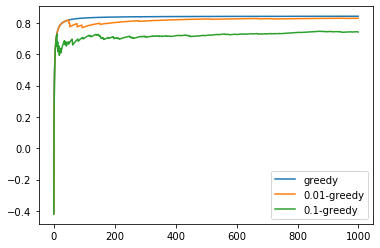

In [4]:
maxsteps = 1000
g1 = MeanValueGreedy(random_env.copy())
g2 = MeanValueEpsilonGreedy(random_env.copy(), epsilon = 0.01)
g3 = MeanValueEpsilonGreedy(random_env.copy(), epsilon = 0.1)
rewards1, mean_rewards1, best_actions_perc1 = single_run(g1, maxsteps)
rewards2, mean_rewards2, best_actions_perc2 = single_run(g2, maxsteps)
rewards3, mean_rewards3, best_actions_perc3 = single_run(g3, maxsteps)
plt.plot(range(maxsteps), mean_rewards1, label = "greedy")
plt.plot(range(maxsteps), mean_rewards2, label = "0.01-greedy")
plt.plot(range(maxsteps), mean_rewards3, label = "0.1-greedy")
plt.legend()
plt.show()

In [9]:
def multi_run(avm, numsteps, numruns):
    mean_rewards = np.zeros(numsteps)
    mean_bestactions = np.zeros(numsteps)
    for r in range(numruns):
        avm.reset()
        for i in range(numsteps):
            avm.step()
        mean_rewards += avm.env.rewards
        mean_bestactions += avm.env.best_actions
    mean_rewards /= numruns
    mean_bestactions /= numruns
    return mean_rewards, mean_bestactions

In [6]:
%time _ = multi_run(MeanValueEpsilonGreedy(testbed_env.copy(), epsilon = 0), 1000, 2000)

CPU times: user 10.8 s, sys: 247 µs, total: 10.8 s
Wall time: 10.9 s


In [10]:
def multi_run_graph(labels, mean_rewards, mean_bestactions):
    plots = len(labels)
    steps = len(mean_rewards[0])
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    for i in range(plots):
        plt.plot(range(steps), mean_rewards[i], label = labels[i])
    plt.xlabel("iteraton steps")
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(122)
    for i in range(plots):
        plt.plot(range(steps), mean_bestactions[i], label = labels[i])
    plt.xlabel("iteraton steps")
    plt.ylabel("% of correct actions")
    plt.legend()

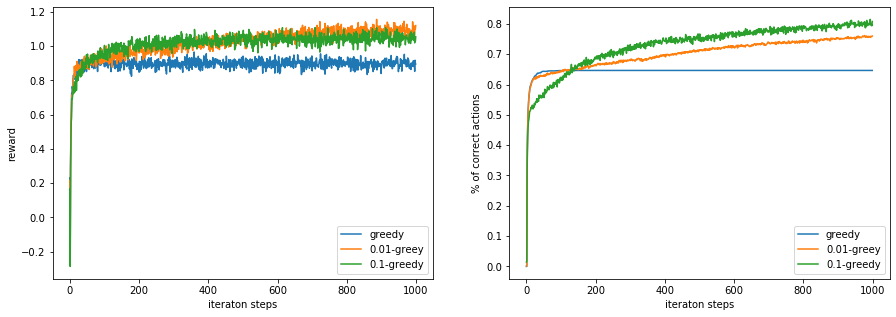

In [11]:
mean_rewards1, mean_bestactions1 = multi_run(MeanValueEpsilonGreedy(testbed_env.copy(), epsilon = 0), 1000, 2000)
mean_rewards2, mean_bestactions2 = multi_run(MeanValueEpsilonGreedy(testbed_env.copy(), epsilon = 0.01), 1000, 2000)
mean_rewards3, mean_bestactions3 = multi_run(MeanValueEpsilonGreedy(testbed_env.copy(), epsilon = 0.1), 1000, 2000)
multi_run_graph(["greedy", "0.01-greey", "0.1-greedy"],
                [mean_rewards1, mean_rewards2, mean_rewards3],
                [mean_bestactions1, mean_bestactions2, mean_bestactions3])
plt.show()

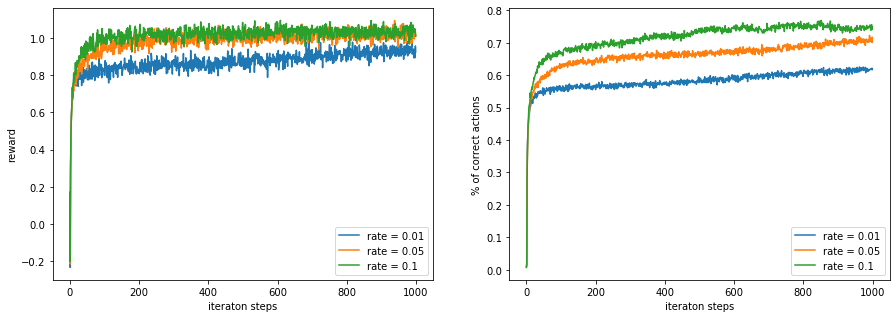

In [16]:
mean_rewards1, mean_bestactions1 = multi_run(
    ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.1, alpha = 0.01), 1000, 2000)
mean_rewards2, mean_bestactions2 = multi_run(
    ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.1, alpha = 0.05), 1000, 2000)
mean_rewards3, mean_bestactions3 = multi_run(
    ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.1, alpha = 0.1), 1000, 2000)
multi_run_graph(["rate = 0.01", "rate = 0.05", "rate = 0.1"],
                [mean_rewards1, mean_rewards2, mean_rewards3],
                [mean_bestactions1, mean_bestactions2, mean_bestactions3])
plt.show()

In [17]:
mean_rewards1, mean_bestactions1 = multi_run(
    ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.0, alpha = 0.1, initial_preference = 5 ), 1000, 2000)
mean_rewards2, mean_bestactions2 = multi_run(
    ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.0, alpha = 0.1), 1000, 2000)
mean_rewards3, mean_bestactions3 = multi_run(
    ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.1, alpha = 0.1), 1000, 2000)
multi_run_graph(["greedy Q_init=5", "greedy Q_init=0","0.1-greedy Q_init=0"],
                [mean_rewards1, mean_rewards2, mean_rewards3],
                [mean_bestactions1, mean_bestactions2, mean_bestactions3])
plt.show()

TypeError: __init__() got an unexpected keyword argument 'initial_estimate'